### Find your API Key at https://quantum-computing.ibm.com/

### Follow the eBook at https://qiskit.org/textbook/preface.html

In [50]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

### The elements of working with a simple quantum circuit are:
* Encode Input
* Execute Algorithm
* Extract the Result 

First We'll work on encoding the inputs

In [58]:
# This cell creates a circuit with 8 qubits and 8 outputs
n = 8
n_q = n # number of qubits in circuit
n_b = n # number of output bits

# QuantumCircuit() maps the input quibits to the output classical bits
qc_output = QuantumCircuit(n_q, n_b)

In [59]:
# Qubits are always initialized at 0. Extraction of outputs is done through measure which maps it to an output bit
for j in range(n):
    qc_output.measure(j,j)
    
# the draw() function draws a quantum circuit diagram
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

In [54]:
# This is one simulator we can use to simulate a quantum calculation
sim = Aer.get_backend('qasm_simulator')  
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment

# from the results, we get a dictionary containing the number of times (counts) each result appeared
counts = result.get_counts()
# because these bits were all initialized as 0, th output is all 0s
counts

{'00000000': 1024}

### Gates Encode Qubits 

The x() operation flips the qubit from the default 0 to 1, acting as a NOT gate. If done on a qubit with state 1, it flips it to 0.

In [63]:
# Single Qubit quantum circuit
qc = QuantumCircuit(1)
qc.draw()

q_0:

In [73]:
# Apply the x to the qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

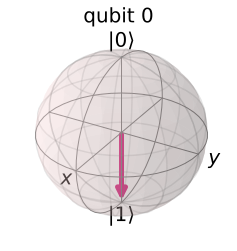

In [70]:
# Viualize in the bloch sphere
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [74]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Y ├┤ Z ├
     └───┘└───┘└───┘

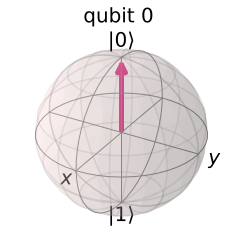

In [75]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [71]:
# Use x() to flip bits from 1 to 0 in our circuit
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)

qc = qc_encode + qc_output
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
counts

{'00100010': 1024}

### Hadamard Gate

Using the Hadamard gate (H) transfers from the computationl basis [0,1] to the X-basis [+,-].
The sequence HZH is equivalent to the x() operation.

In [98]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘

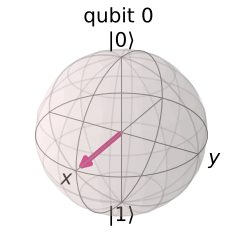

In [99]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [100]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

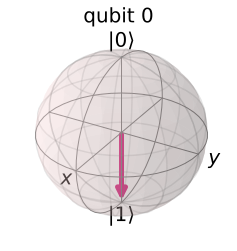

In [101]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [102]:
# HYH is equivalent to the X() gate
qc = QuantumCircuit(1)
qc.h(0)
qc.y(0)
qc.h(0)
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ Y ├┤ H ├
     └───┘└───┘└───┘

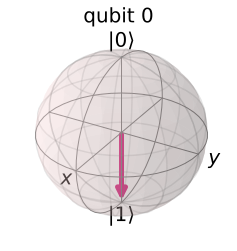

In [103]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

### The Rϕ or Rz Gate

The Rϕ gate is parameterized, and needs a real number imput to tell it what to do. For a parameter ϕ it is [[1,0], [0, e^ϕ*i]] </br>
The Z-gate is actually a special case of the Rϕ gate where ϕ is pi, as are the I, S and T gates.

In [106]:
# In Qiskit, we specify an Rϕ-gate using rz(phi, qubit)
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw()

┌─────────┐
q_0: ┤ RZ(π/4) ├
     └─────────┘

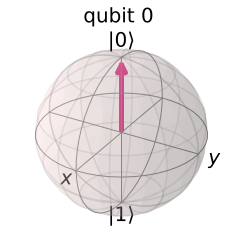

In [107]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [114]:
# The I gate is the identity matrix [[1,0]. [0,1]] and is not used very often
# The S-gate or S-dagger gate is an Rϕ gate where ϕ = -pi/2

qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q_0: ┤ S ├┤ SDG ├
     └───┘└─────┘

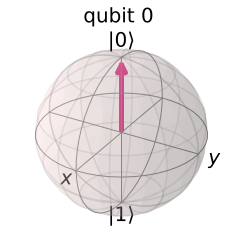

In [115]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [112]:
# The T gate is where ϕ = pi/4

qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q_0: ┤ T ├┤ TDG ├
     └───┘└─────┘

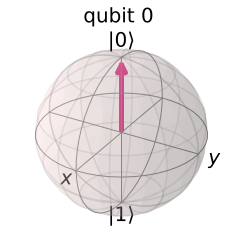

In [113]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)


There is nothing special about the Z-basis, except that it has been selected as the standard computational basis. That is why we have names for the S and T-gates, but not their X and Y equivalents √X and  4√Y. 

## Half - Adder 

The previous cells just described a circuit that had no algorithm, just a mapping from initial state to output. </br>
Now we will build a circuit capable of doing calculations, wiht the output mapped to classical bits. </br>
To do this we'll need two new gates: CNOT and Toffoli or XOR and AND logic gates. </br>
The NOT, CNOT and Tofoli gates allow us to add any set of numbers together.

#### CNOT Gate 

The CNOT gate can tell us if the output bits are the same or different.

In [98]:
# We can use cx() function to encode the CNOT gate
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)

# Here q_0 is the control qubit, while q_1 is the target qubit. Together they form the CNOT gate
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [99]:
# Both qubits are initialized as 0, so they are the same, outputting 0s

qc = QuantumCircuit(2,2)
qc.cx(0,1)
qc.measure(0,1)
qc.measure(1,1)
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
print(counts)

{'00': 1024}


In [95]:
qc = QuantumCircuit(2,2)
qc.x(0) # Adding this x() changes one of the bits so they are different, outputting a 1
qc.cx(0,1)
qc.measure(0,1)
qc.measure(1,1)
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
print(counts)

{'10': 1024}


In [96]:
qc = QuantumCircuit(2,2)
qc.x(0) # Adding this x() changes one of the bits so they are different
qc.x(1) # Adding this second x() makes them the same again, outputting 0s
qc.cx(0,1)
qc.measure(0,1)
qc.measure(1,1)
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
print(counts)

{'00': 1024}


In [107]:
# Initialize a 4-qubit quantum circuit
qc_ha = QuantumCircuit(4,2)

# encode inputs in qubits 0 and 1 so they are different
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.

# The barrier() function separates the different parts of the circuit
qc_ha.barrier()

# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

░            ░       
q_0: ──────░───■────────░───────
     ┌───┐ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [112]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
print(counts)

{'01': 1024}


### Toffoli gate
This is the equivalent of the AND boolean gate. It measures whether both bits are 1.

In [113]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

In [114]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
print(counts)

{'10': 1024}


### 1.3 Representing Qubit States

Qubit states are summarized as vectors, in python a list of values. 

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw() 

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [4]:
svsim = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = svsim.run(qobj).result()
out_state = result.get_statevector()

# Note j in python is equivalent to th eimaginary number i
print(out_state)

[0.+0.j 1.+0.j]


In [6]:
qc.measure_all()

counts = result.get_counts()
print(counts)

qc.draw()

{'1': 1.0}


┌─────────────────┐ ░ ┌─┐ ░ ┌─┐
    q_0: ┤ initialize(0,1) ├─░─┤M├─░─┤M├
         └─────────────────┘ ░ └╥┘ ░ └╥┘
 meas: 1/═══════════════════════╩═════╬═
                                0     ║ 
                                      ║ 
meas0: 1/═════════════════════════════╩═
                                      0

[0.57735027+0.j 0.81649658+0.j]


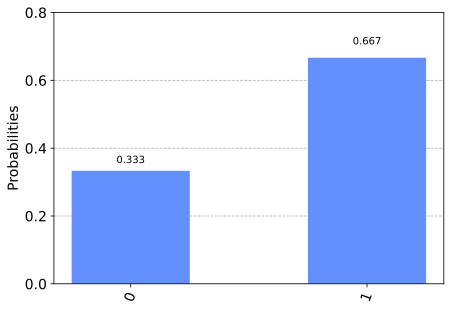

In [49]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>
is2 =[1/sqrt(3), sqrt(2)/sqrt(3)]
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(is2, 0) # Initialise the 0th qubit in the state `initial_state`
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector() # Execute the circuit
print(state) 

qobj = assemble(qc)
results = svsim.run(qobj).result().get_counts()

# The bit has an equal chance of being a 0 or 1.
plot_histogram(results)

### Measurement and Dirac (Bra-Ket) notation
To find the probability of measuring a state vector |a} we take the inner product of |a} and |b} </br>
The magnitude of the state vector needs to sum up to one. </br>

The ket is |a} = a column vector of complex onjugates </br>
The Bra is {b| a row vector of complex conjugates </br>
The Bra-Ket is the inner product of the bra and ket {b|a}. 

The Born rule is that the probability that a state collapses during measurement (onto the basis [x, x-] to the state x is: sum of P(x) = 1. This is also called normalization

In [21]:
# If you try and initialize a qubit with a statevector that doesn't sum to 1
try:
    vector = [1,0]
    qc.initialize(vector, 0)
    print(f'the vector {vector} sums to 1!')
    qc.draw()
except:
    print(f'the vector sum of amplitudes in {vector} 1= 1!')

the vector [1, 0] sums to 1!


In [43]:
# Initialize a qubit with a vector that returns a probability of 1/3 for 1
vector = [sqrt(1/3), sqrt(2/3)]

qc.initialize(vector, 0)
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = svsim.run(qobj).result()
out_state = result.get_statevector()

# Note j in python is equivalent to th eimaginary number i
print(out_state)

[0.57735027+0.j 0.81649658+0.j]
